# <span style='font-family:Georgia'> Geometric Brownian Motion

A stochastic process St is said to follow a GBM if it satisfies the following stochastic differential equation (SDE):

$$
\begin{equation} dS_{t} = \mu S_{t}\,dt+\sigma S_{t}\,dW_{t} \tag{1} \end{equation}
$$


For an arbitrary initial value $S_0$ the above SDE has the analytic solution:

$$
\begin{equation}
S_{t}=S_{0}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right)}\\
S_{T}=S_{t}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)(T-t)+\sigma W_{T-t}\right)}
\end{equation}
$$


## <span style='font-family:Georgia'> Averages


$$\widehat{g^m}(T, N) = \frac{1}{T} \ln \bigg(\frac{1}{N} \sum_1^N \bigg( \frac{\int_0^T dx_i(t)}{x_i(0)}\bigg) \bigg)$$

Taking the limit for $N \to \infty$ and $T \to \infty$ yields two different measures, hence the non ergodic property of then process.

### <span style='font-family:Georgia'> Ensemble Average
    
$$E(g^m) = \lim_{N\to \infty} \widehat{g^m}(T, N) = \mu^m$$

[...]

The expected value (or ensemble average), i.e. taking the limit for  $N \to \infty$:

$$E(S_t)=S_0e^{(\mu-\sigma^2/2)t}E(e^{\sigma B_t}).$$


Since $E(e^{uZ})=e^{u^2/2}$ for every real number $u$ and every standard normal random variable $Z$, the identity $E(e^{\sigma B_t})=e^{\sigma^2 t/2}$ follows from the fact that $\sigma B_t$ is distributed like $\sigma t \sqrt{Z}$. Simplifying, one gets the same expression of $E(X_t)$ than by the direct route, namely,


$$E(S_t)=E(S_0)e^{\mu t}.$$

$$E \bigg( \frac{S_t}{S_0} \bigg) =e^{\mu t}.$$

### <span style='font-family:Georgia'> Time Average
    
$$\overline{g^m} = \lim_{t\to \infty} \widehat{g^m}(T, N) = \mu^m - \frac{(\sigma^2)}{2} = \frac{d E(\ln(x))}{dt}$$

The time average:

https://math.stackexchange.com/questions/176196/calculate-the-expected-value-of-y-ex-where-x-sim-n-mu-sigma2
https://quant.stackexchange.com/questions/32244/geometric-brownian-motion-percentage-returns-vs-log-returns
https://math.stackexchange.com/questions/40826/expectation-of-geometric-brownian-motion

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
def BrownianMotionEnsembleAverage(S0, mu, sigma, T, dt):
    
    paths = np.zeros((T + 1), np.float64)
    paths[0] = S0

    for t in range(1, T + 1):
        rand = 0
        paths[t] = paths[t - 1] * np.exp(mu)
        
    return pd.DataFrame(paths)

In [72]:
def BrownianMotionTimeAverage(S0, mu, sigma, T, dt):
    
    paths = np.zeros((T + 1), np.float64)
    paths[0] = S0

    for t in range(1, T + 1):
        rand = 0
        paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * 1 +
                                         sigma * np.sqrt(1) * rand)
        
    return pd.DataFrame(paths)

In [55]:
def BrownianMotion(S0, mu, sigma, T, dt, I):
    
    paths = np.zeros((T + 1, I), np.float64)
    paths[0] = S0

    for t in range(1, T + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * 1 +
                                         sigma * np.sqrt(1) * rand)
        
    return pd.DataFrame(paths)

In [134]:
S0 = 100.
mu = 0.005 # mu
sigma = 0.15  # st dev
dt = 1  # time steps
i = 500  # num
T = 100  # time

In [135]:
simulations = BrownianMotion(S0, mu, sigma, T, dt, i)

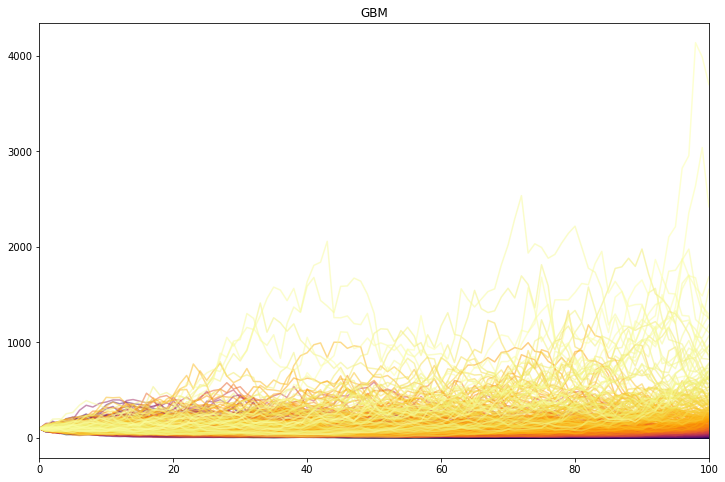

In [136]:
simulations.sort_values(simulations.index[-1], axis=1).plot(legend=False,
                                                            figsize=(12, 8), 
                                                            cmap='inferno', 
                                                            linewidth=1.5,
                                                            alpha=0.5,
                                                           title='GBM')

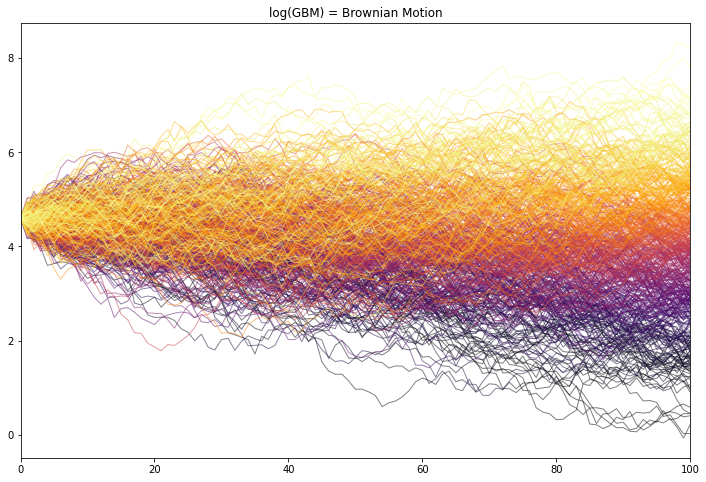

In [137]:
np.log(simulations).sort_values(simulations.index[-1], axis=1).plot(legend=False,
                                                            figsize=(12, 8), 
                                                            cmap='inferno', 
                                                            linewidth=1,
                                                            alpha=0.5, 
                                                                   title='log(GBM) = Brownian Motion')

## <span style='font-family:Georgia'> GBM Time Average

In [138]:
ta_simulation = BrownianMotion(S0, mu, sigma, 100000, dt, 1)
time_average_GBM = BrownianMotionTimeAverage(S0, mu, sigma, 100000, dt)

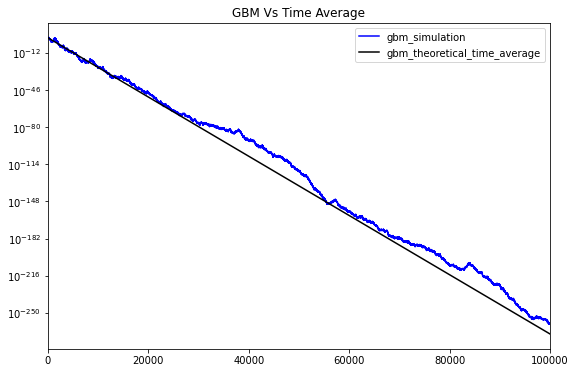

In [139]:
%matplotlib inline
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
gbm_vs_time_avg = pd.concat([ta_simulation, time_average_GBM], axis=1)
gbm_vs_time_avg.columns =['gbm_simulation', 'gbm_theoretical_time_average']
gbm_vs_time_avg.plot(ax=ax, logy=True, color=['blue', 'black'])
ax.set_title('GBM Vs Time Average')
plt.show()

## <span style='font-family:Georgia'> GBM Ensemble Average

In [140]:
t = 10
ea_simulation = BrownianMotion(S0, mu, sigma, t, dt, 1000)  # ensemble average
ensemble_average_GBM = BrownianMotionEnsembleAverage(S0, mu, sigma, t, dt)

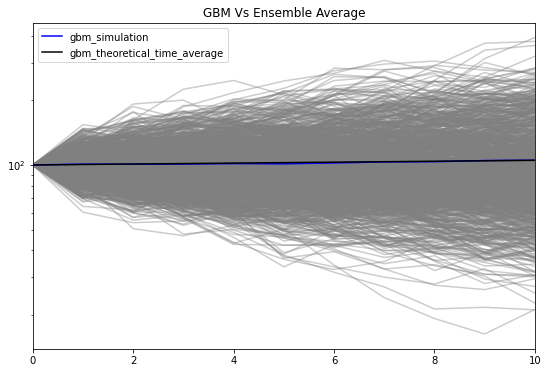

In [142]:
%matplotlib inline
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)

ea_simulation.plot(ax=ax, alpha=0.4, color='gray', legend=False)
gbm_vs_ens_avg = pd.concat([ea_simulation.mean(axis=1), ensemble_average_GBM], axis=1)
gbm_vs_ens_avg.columns =['gbm_simulation', 'gbm_theoretical_time_average']
gbm_vs_ens_avg.plot(ax=ax, logy=True, color=['blue', 'black'])
ax.set_title('GBM Vs Ensemble Average')
plt.show()

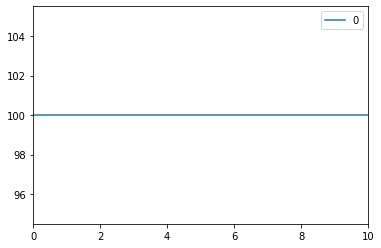

In [99]:
ensemble_average_GBM.plot()

In [49]:
np.log(simulations.iloc[-1]/100).std()

0.964106196489426

Intuitively speaking, a “stationary” price series means that the prices diff use
from its initial value more slowly than a geometric random walk would. Mathematically,
we can determine the nature of the price series by measuring this speed of diffusion. The speed of diffusion can be characterized by the variance:

$$Var(\tau) = E(|z(t + \tau) − z(t)|^2)$$

where z is the log prices (z = log( y)), τ is an arbitrary time lag, and 〈…〉 is

In [5]:
from fbm import fbm

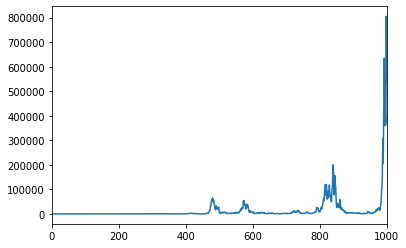

In [15]:
np.exp(pd.Series(fbm(n=1000, hurst=0.5, length=100, method='daviesharte'))).plot()
plt.show()